<a href="https://colab.research.google.com/github/rahulmatade/rahulmatade/blob/main/Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import packages**

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

# **Load data into the environment for examination**

In [6]:
sales = pd.read_csv("/content/Sales_Data.csv")
sales.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


**Check the dimensions of the table**

In [7]:
sales.shape

(185950, 11)

**Get detailed information about the table, along with memory usage**

In [8]:
sales.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 65.1 MB


**Get detailed information about data in the table**

In [9]:
sales.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


**Find number of unique entries in "Product" and "City" columns, which can be converted to "Category" datatype**

In [10]:
sales[["Product", "City"]].nunique()

,0
Product,19
City,9


# **Data Pre-processing**

**Delete unnecessary "Unnamed: 0" column**

In [11]:
sales.drop(columns="Unnamed: 0", inplace=True)

**Rename columns**

In [12]:
sales.columns = ["Order_ID",
                 "Product",
                 "Quantity",
                 "Price_Each",
                 "Order_Date",
                 "Purchase_Address",
                 "Month",
                 "Sales_Amount",
                 "City",
                 "Hour"]

sales.columns


Index(['Order_ID', 'Product', 'Quantity', 'Price_Each', 'Order_Date',
       'Purchase_Address', 'Month', 'Sales_Amount', 'City', 'Hour'],
      dtype='object')

**Check for whitespaces from columns with Dtype "Object"**

In [13]:
print(sales[["Product", "Purchase_Address", "City"]].apply(lambda x: x.str.startswith(" ")).sum())

print(sales[["Product", "Purchase_Address", "City"]].apply(lambda x: x.str.endswith(" ")).sum())

Product                  0
Purchase_Address         0
City                185950
dtype: int64
Product             0
Purchase_Address    0
City                0
dtype: int64


**All rows in "City" column have whitespaces, which we will trim**

In [14]:
sales["City"] = sales["City"].str.lstrip()

In [15]:
print(sales[["City"]].apply(lambda x: x.str.startswith(" ")).sum())

City    0
dtype: int64


**Set columns to appropriate datatypes**

In [16]:
sales = sales.astype({"Order_ID":"int32",
                      "Product":"category",
                      "Quantity":"int8",
                      "Order_Date":"datetime64[ns]",
                      "Purchase_Address":"category",
                      "Month":"int8",
                      "City":"category",
                      "Hour":"int8"})

sales.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185950 non-null  int32         
 1   Product           185950 non-null  category      
 2   Quantity          185950 non-null  int8          
 3   Price_Each        185950 non-null  float64       
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Purchase_Address  185950 non-null  category      
 6   Month             185950 non-null  int8          
 7   Sales_Amount      185950 non-null  float64       
 8   City              185950 non-null  category      
 9   Hour              185950 non-null  int8          
dtypes: category(3), datetime64[ns](1), float64(2), int32(1), int8(3)
memory usage: 22.8 MB


**Check for null/missing values**

In [17]:
sales.isna().sum()

,0
Order_ID,0
Product,0
Quantity,0
Price_Each,0
Order_Date,0
Purchase_Address,0
Month,0
Sales_Amount,0
City,0
Hour,0


**Check for duplicate rows**

In [18]:
sales[sales.duplicated()]

,Order_ID,Product,Quantity,Price_Each,Order_Date,Purchase_Address,Month,Sales_Amount,City,Hour
438,296081,Flatscreen TV,1,300.00,2019-12-30 16:52:00,"970 Sunset St, Austin, TX 73301",12,300.00,Austin,16
1727,297311,Bose SoundSport Headphones,1,99.99,2019-12-07 07:30:00,"858 Willow St, Los Angeles, CA 90001",12,99.99,Los Angeles,7
2812,298358,Apple Airpods Headphones,1,150.00,2019-12-04 15:57:00,"482 8th St, San Francisco, CA 94016",12,150.00,San Francisco,15
3119,298657,Lightning Charging Cable,1,14.95,2019-12-01 18:22:00,"428 12th St, Atlanta, GA 30301",12,14.95,Atlanta,18
3363,298883,Wired Headphones,1,11.99,2019-12-28 18:07:00,"516 Willow St, Los Angeles, CA 90001",12,11.99,Los Angeles,18
...,...,...,...,...,...,...,...,...,...,...
181613,218756,AAA Batteries (4-pack),1,2.99,2019-06-11 14:54:00,"362 Hickory St, Boston, MA 02215",6,2.99,Boston,14
181883,219007,AA Batteries (4-pack),1,3.84,2019-06-24 11:16:00,"42 8th St, Los Angeles, CA 90001",6,3.84,Los Angeles,11
183323,220392,Lightning Charging Cable,1,14.95,2019-06-08 17:13:00,"472 8th St, Portland, ME 04101",6,14.95,Portland,17
183826,220882,Lightning Charging Cable,1,14.95,2019-06-13 17:53:00,"588 Lake St, Boston, MA 02215",6,14.95,Boston,17


In [19]:
sales.duplicated().sum()

264

**Delete duplicated rows**

In [20]:
sales = sales.drop_duplicates().reset_index(drop=True)

**Check no. of rows after deleting duplicates**

In [21]:
sales.shape[0]

185686

**Add new columns: "Date" and "Day_of_Week**

In [22]:
sales = (sales.assign(
    Date=sales["Order_Date"].dt.date,
    Day_of_Week=sales["Order_Date"].dt.dayofweek)
        )

sales.head()

,Order_ID,Product,Quantity,Price_Each,Order_Date,Purchase_Address,Month,Sales_Amount,City,Hour,Date,Day_of_Week
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019-12-30,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019-12-29,6
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019-12-12,3
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019-12-22,6
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019-12-18,2


**Set "Date" column as index and drop redundant "Order_Date" column**

In [23]:
sales = (sales
         .set_index("Date")
         .sort_index()
         .drop("Order_Date", axis=1)
        )

sales.head()

,Order_ID,Product,Quantity,Price_Each,Purchase_Address,Month,Sales_Amount,City,Hour,Day_of_Week
Date,,,,,,,,,,
2019-01-01,144537,Bose SoundSport Headphones,1,99.99,"164 West St, Boston, MA 02215",1,99.99,Boston,9,1
2019-01-01,147414,Lightning Charging Cable,1,14.95,"12 Hickory St, San Francisco, CA 94016",1,14.95,San Francisco,23,1
2019-01-01,141364,AA Batteries (4-pack),1,3.84,"657 Lincoln St, Dallas, TX 75001",1,3.84,Dallas,7,1
2019-01-01,145122,ThinkPad Laptop,1,999.99,"501 Adams St, Los Angeles, CA 90001",1,999.99,Los Angeles,16,1
2019-01-01,147386,USB-C Charging Cable,1,11.95,"793 11th St, San Francisco, CA 94016",1,11.95,San Francisco,11,1


**Set structure of table to desired order of columns**

In [24]:
desired_order = ["Order_ID",
                 "Product",
                 "Quantity",
                 "Price_Each",
                 "Sales_Amount",
                 "Purchase_Address",
                 "City",
                 "Month",
                 "Day_of_Week",
                 "Hour"]

sales = sales[desired_order]

sales.head()

,Order_ID,Product,Quantity,Price_Each,Sales_Amount,Purchase_Address,City,Month,Day_of_Week,Hour
Date,,,,,,,,,,
2019-01-01,144537,Bose SoundSport Headphones,1,99.99,99.99,"164 West St, Boston, MA 02215",Boston,1,1,9
2019-01-01,147414,Lightning Charging Cable,1,14.95,14.95,"12 Hickory St, San Francisco, CA 94016",San Francisco,1,1,23
2019-01-01,141364,AA Batteries (4-pack),1,3.84,3.84,"657 Lincoln St, Dallas, TX 75001",Dallas,1,1,7
2019-01-01,145122,ThinkPad Laptop,1,999.99,999.99,"501 Adams St, Los Angeles, CA 90001",Los Angeles,1,1,16
2019-01-01,147386,USB-C Charging Cable,1,11.95,11.95,"793 11th St, San Francisco, CA 94016",San Francisco,1,1,11



# **Data Analysis and Visualization**



Calculate unique values:

- order_id
- product
- purchase_address
- city



In [26]:
print(f'Order_ID: {sales["Order_ID"].nunique()}\n'
      f'Product: {sales["Product"].nunique()}\n'
      f'Purchase_Address: {sales["Purchase_Address"].nunique()}\n'
      f'City: {sales["City"].nunique()}')


Order_ID: 178437
Product: 19
Purchase_Address: 140787
City: 9




Calculate:

- Total Sales Amount



In [29]:
sales["Sales_Amount"].sum()

34465537.94

- Average Price Per Order


In [31]:
(sales["Sales_Amount"].sum() / sales["Order_ID"].nunique()).round()

193.0

- Quantity Sold

In [32]:
sales["Quantity"].sum()

208812


# **Visualizations**

- Total Sales Amount by Product



<ipython-input-33-45372f928df6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Product")


<Axes: title={'center': 'Total Sales Amount by Product'}, xlabel='Product', ylabel='Million USD'>

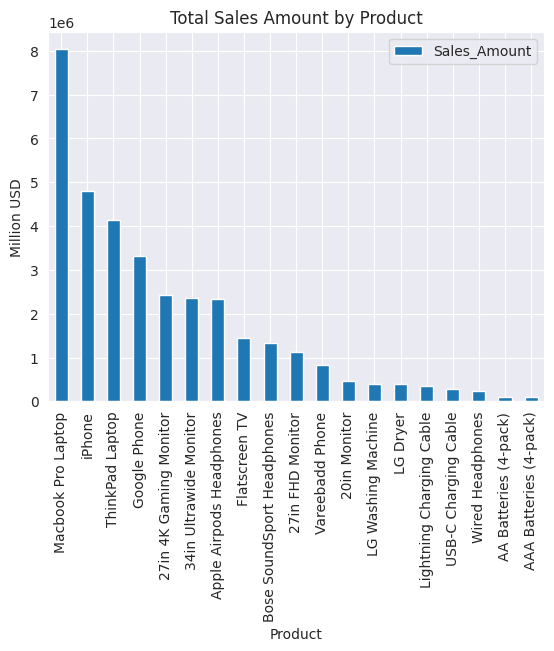

In [33]:
(sales
.groupby("Product")
.agg({"Sales_Amount":"sum"})
.sort_values(by="Sales_Amount", ascending=False)
.plot.bar(
    title="Total Sales Amount by Product",
    ylabel="Million USD",
    xlabel="Product")
)

- Quantity sold by Product


<ipython-input-34-a5aa05800db7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Product")


<Axes: title={'center': 'Quantity Sold by Product'}, xlabel='Product'>

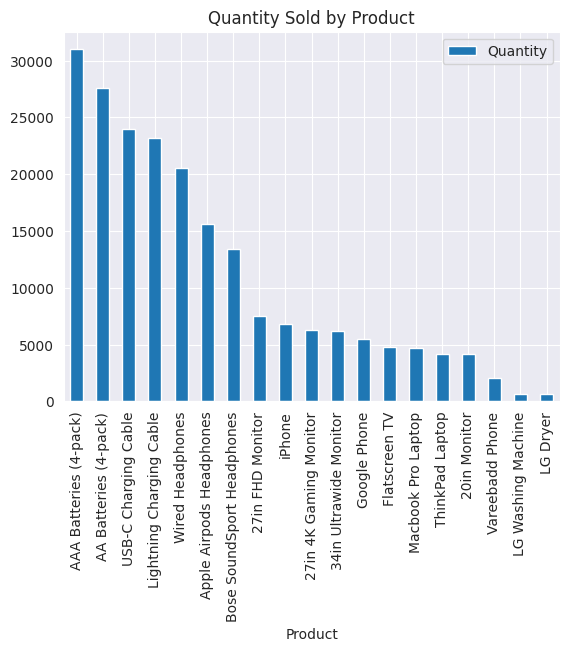

In [34]:
(sales
 .groupby("Product")
 .agg({"Quantity":"sum"})
 .sort_values(by="Quantity", ascending=False)
 .plot.bar(
     title="Quantity Sold by Product",
     xlabel="Product")
)


- Revenue by City


<ipython-input-35-ab223e2ced2d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("City")


<Axes: title={'center': 'Revenue by City'}, xlabel='City', ylabel='Million USD'>

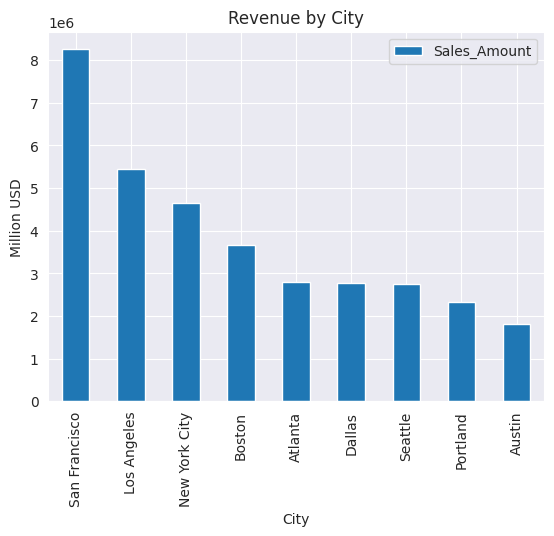

In [35]:
(sales
 .groupby("City")
 .agg({"Sales_Amount":"sum"})
 .sort_values(by="Sales_Amount", ascending=False)
 .plot.bar(
     title="Revenue by City",
     ylabel="Million USD",
     xlabel="City")
)



- Monthly Sales Trend


(0.0, 4747639.8270000005)

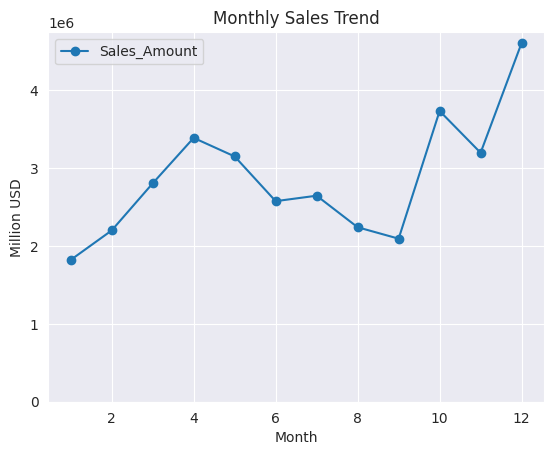

In [36]:
monthly_sales = (sales
                 .groupby("Month")
                 .agg({"Sales_Amount":"sum"})
                 .plot(
                     title="Monthly Sales Trend",
                     ylabel="Million USD",
                     xlabel="Month",
                     marker="o")
                )

monthly_sales.set_ylim(0)

- Sales by Day


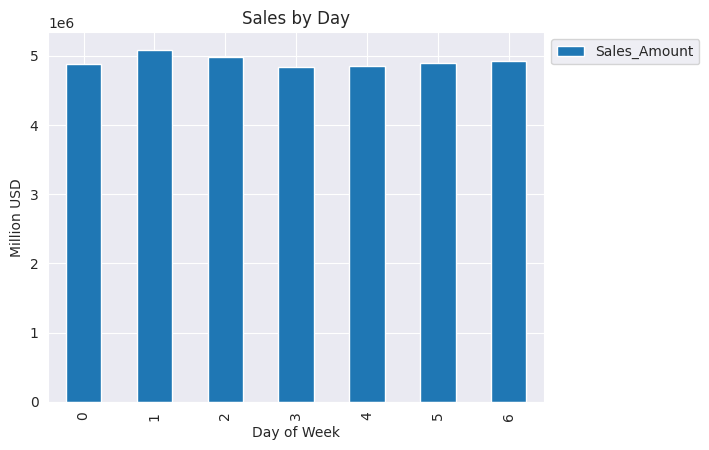

In [37]:
day_sales = (sales
             .groupby("Day_of_Week")
             .agg({"Sales_Amount":"sum"})
             .plot.bar(
                 title="Sales by Day",
                 ylabel="Million USD",
                 xlabel="Day of Week")
             .legend(bbox_to_anchor=(1,1))
            )


day_sales


- Hourly Sales Distribution (Scatterplot)

<Axes: title={'center': 'Hourly Sales Distribution'}, xlabel='Hour', ylabel='Million USD'>

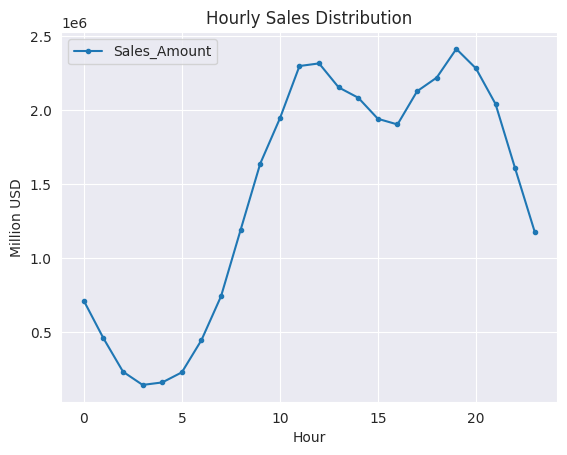

In [38]:
(sales
 .groupby("Hour")
 .agg({"Sales_Amount":"sum"})
 .plot(
     title="Hourly Sales Distribution",
     ylabel="Million USD",
     xlabel="Hour",
     marker=".")
)

- Hourly Sales Distribution (Bar Graph)

<Axes: title={'center': 'Hourly Sales Distribution'}, xlabel='Hour', ylabel='Million USD'>

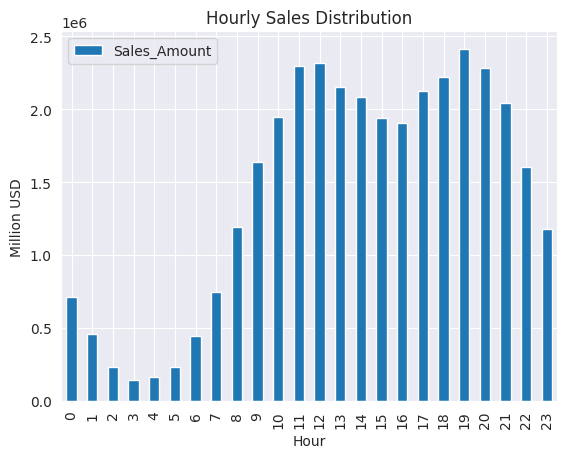

In [39]:
(sales
 .groupby("Hour")
 .agg({"Sales_Amount":"sum"})
 .plot.bar(
     title="Hourly Sales Distribution",
     ylabel="Million USD",
     xlabel="Hour")
)


# **Insights**

- The product that performs the best and contributes the most to overall sales is the Macbook Pro laptop.   
- By quantity, both 4-packs of AAA and AA batteries are the best-selling items, followed by charging cables.
- The products with the highest "quantity" rankings have the lowest overall sales, which is explained by their lower prices when compared to other products in the range.
- San Francisco contributes the most revenue and leads in sales, followed by New York City and Los Angeles. The market's substantial presence in major cities is highlighted by the data.
- Peak sales in October, November, and December indicate a seasonal pattern in the data, which reflects higher holiday-season consumer spending. There is a drop in sales after the holidays, which suggests that consumers are not as active after the holidays.
- The general pattern indicates a slight uptick in sales from Monday through Tuesday, with comparatively steady sales for the remainder of the week.
- Sales peak during late morning to early afternoon, notably between 10 AM and 2 PM, and again from 5 PM to 8 PM. This insight is crucial for refining staffing and marketing strategies, enabling the business to enhance customer service by ensuring adequate staffing during peak hours.

